## CS 505 – Assignment One
  Name: Tao He
  
  Discussion Partner: Yifan Zhang

  Date: 09/18/2022
  
---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# !pip install clean-text
# !pip3 install tweepy
# !pip3 install tweepy --upgrade
import csv
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
# from cleantext import clean

In [3]:
#Step 2: initiate your client
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAAl1hAEAAAAAra3%2BdGSwRPN3G2BB45Ea8fDSny4%3DXWlNMYMgowFpQWpqJGYjtjpZmUbYQxyrY3IZeRAddDCZm0S6Tm') # replace with your bearer token here.

In [4]:
#Step 3: collect some tweets related to 'Lego'
query = 'Lego lang:en -is:retweet' # the query restricts the collected tweets to contain 'Lego', to be in English, and to not be re-tweets. 
tweets = client.search_recent_tweets(query=query, max_results=100) # we are using search_recent_tweets, to search for tweets in recent 7 days. Bring 10 tweets back.
for tweet in tweets.data[:10]:
    print(tweet.text)
    print('-----------------------------')

@AcsStudios @Etheram2 That's for the movie so idk what they had in mind for that, but they don't have any confirmed races in the show, nor any other original Lego theme
-----------------------------
Interviews in person today for the first time in a v long time, it meant the Lego could come out for a group exercise considering our council behaviours 😀 https://t.co/YZ6zRd3csU
-----------------------------
Hmm 6 games 6 tags eh?

Legend of zelda (any of them lol)
Valorant
Overwatch
Dead by daylight
Fall guys
LEGO Star wars for sure

@adonewithyou @cosmicquarts @RealJanieLouise @Brianne_hed @BadDonkeyJP @carzavol https://t.co/IyMEKM2lp3
-----------------------------
£18.98 &gt;&gt;&gt; FROM £29.99
.
PRICE DROP 
.
https://t.co/6hN8T5pgMV
-----------------------------
i finally got the lego batmobile!!! https://t.co/uKsFmn2h5l
-----------------------------
A big shout out to all the year 7s, 8s and 9s who came to Lego club this lunch time. You were all amazing and thank you for creating our

In [5]:
query = 'Lego lang:en -is:retweet'
tweets = list(tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000))
print("{} tweets are collected.".format(len(tweets))) # check the number of tweets we collected.

1000 tweets are collected.


In [6]:
driveFolderDirectory = '/content/drive/My Drive/CS505/tweets.csv' 
pathToSave = driveFolderDirectory

with open(pathToSave, 'w', newline='') as csvfile:
  fieldnames = ['idx','tweetId', 'tweetText']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for i,tweet in enumerate(tweets):
    writer.writerow({'idx': i, 'tweetId': tweet.id,'tweetText': tweet.data['text']})

### Task 1: Convert all capital letters into lower case.

In [74]:
tweets = pd.read_csv (r'/content/drive/My Drive/CS505/tweets.csv') # read the file into a data frame 
tweets.head(5) # check the first five rows

,idx,tweetId,tweetText
0,0,1572279380075847681,🤖🧩 Orpheus Music Box 3D Wooden Puzzle Cool and...
1,1,1572279277332361216,@AcsStudios @Etheram2 That's for the movie so ...
2,2,1572279259779006467,Interviews in person today for the first time ...
3,3,1572279240791560192,Hmm 6 games 6 tags eh?\n\nLegend of zelda (any...
4,4,1572279212555530240,£18.98 &gt;&gt;&gt; FROM £29.99\n.\nPRICE DROP...


In [75]:
# convert all capital letters into lower case
tweets["tweetText"] = tweets["tweetText"].str.lower()
tweets.head(5) # examine

,idx,tweetId,tweetText
0,0,1572279380075847681,🤖🧩 orpheus music box 3d wooden puzzle cool and...
1,1,1572279277332361216,@acsstudios @etheram2 that's for the movie so ...
2,2,1572279259779006467,interviews in person today for the first time ...
3,3,1572279240791560192,hmm 6 games 6 tags eh?\n\nlegend of zelda (any...
4,4,1572279212555530240,£18.98 &gt;&gt;&gt; from £29.99\n.\nprice drop...


### Task 2: Remove from the text all hashtags, all URLs, and all numbers (e.g., prices, floating-point, integers, etc.).

In [76]:
# remove hashtags @[A-Za-z0-9_]+
# remove tags #[A-Za-z0-9_]+
# remove URLs \S*https?:\S*
# remove all numbers (\$)?([0-9]+)?(\.)?([0-9]+)?

clean_tweet1 = []
for i in tweets["tweetText"]:
    clean_tweet1.append(re.sub(("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|(\$)?([0-9]+)?(\.)?([0-9]+)?"),"", i))

clean_tweet2 = []
for i in clean_tweet1:
    clean_tweet2.append(re.sub((r"\S*https?:\S*"),"", i))

In [77]:
#  examine the text file to see what form these are in.
tweets["tweetText"] = clean_tweet2
tweets["tweetText"].head(5)

0    🤖🧩 orpheus music box d wooden puzzle cool and ...
1      that's for the movie so idk what they had in...
2    interviews in person today for the first time ...
3    hmm  games  tags eh?\n\nlegend of zelda (any o...
4             £ &gt;&gt;&gt; from £\n\nprice drop \n\n
Name: tweetText, dtype: object

### Task 3: Remove the affixes -ing, -ed, and -ly from all words.

In [78]:
clean_tweet3 = []
for i in tweets["tweetText"]:
    clean_tweet3.append(re.sub(("ing|ed|ly"),"", i))

tweets["tweetText"] = clean_tweet3
tweets["tweetText"].head(5)

0    🤖🧩 orpheus music box d wooden puzzle cool and ...
1      that's for the movie so idk what they had in...
2    interviews in person today for the first time ...
3    hmm  games  tags eh?\n\nlegend of zelda (any o...
4             £ &gt;&gt;&gt; from £\n\nprice drop \n\n
Name: tweetText, dtype: object

### Task 4: Replace all forms of the verb “to be” with the stem be.

In [79]:
# home school yours his her its ours their?
# to home|to school|to yours|to his|to her|to its|to ours|to their?

clean_tweet4 = []
for i in tweets["tweetText"]:
    clean_tweet4.append(re.sub(("to "),"", i))

tweets["tweetText"] = clean_tweet4
tweets["tweetText"].head(5)

0    🤖🧩 orpheus music box d wooden puzzle cool and ...
1      that's for the movie so idk what they had in...
2    interviews in person today for the first time ...
3    hmm  games  tags eh?\n\nlegend of zelda (any o...
4             £ &gt;&gt;&gt; from £\n\nprice drop \n\n
Name: tweetText, dtype: object

### Task 5: (Removing stop words) Remove all instances of the 10 most common words in English

In [80]:
# 10 most common words from the list here: https://en.wikipedia.org/wiki/Most_common_words_in_English.

clean_tweet5 = []
for i in tweets['tweetText']:
    clean_tweet5.append(re.sub(r'the |be |to |of |and |a |in |that |have |i ', '', i))

tweets["tweetText"] = clean_tweet5
tweets["tweetText"].head(5)

0    🤖🧩 orpheus music box d wooden puzzle cool uniq...
1      that's for movie so idk what they had mind f...
2    interviews person today for first time v long ...
3    hmm  games  tags eh?\n\nlegend zeld(any them l...
4             £ &gt;&gt;&gt; from £\n\nprice drop \n\n
Name: tweetText, dtype: object

### Task 6: Remove emoji and other strange symbols.

Firstly, in the former text, there are many "&gt;", which is greater-than sign. Since they are meaningless in the future analysis, I removed them.

In [81]:
clean_tweet6 = []
for i in tweets['tweetText']:
    clean_tweet6.append(re.sub(r'&gt;', '', i))
tweets["tweetText"] = clean_tweet6

Also, there are many emoji and some strange symbols instead of text, which are not suitable for language processing. Furthermore, we are supposed to break them into words and sentences, therefore, I decided to remove them from the text. 

In [82]:
# remove emoji and other strange symbols.
# print(clean(tweets["tweetText"], no_emoji=True))
clean_tweet6 = []
for i in tweets["tweetText"]:
    clean_tweet6.append(re.sub(r'[^a-zA-Z,.?!():;\'"]', ' ', i))

tweets["tweetText"] = clean_tweet6
tweets["tweetText"].head(5)

0       orpheus music box d wooden puzzle cool uniq...
1      that's for movie so idk what they had mind f...
2    interviews person today for first time v long ...
3    hmm  games  tags eh?  legend zeld(any them lol...
4                                from    price drop   
Name: tweetText, dtype: object

### Task 7: Break the data into tokens (words) and sentences and remove all characters which are not lower-case letters.

In [108]:
def my_sent_tokenize(text):
  tokens = re.split('[;.?!]', text)
  return(tokens)

def my_word_tokenize(text):
  tokens = re.split(r"\s+", text)
  tokens = list(filter(None, tokens))
  return(tokens)

In [109]:
broken_text = []
for str in tweets['tweetText']: 
  txt = my_sent_tokenize(str)
  for sent in txt: 
    temp = my_word_tokenize(sent)
    broken_text.append(temp)

### Task 8: Display a histogram of the length of the sentences in your data

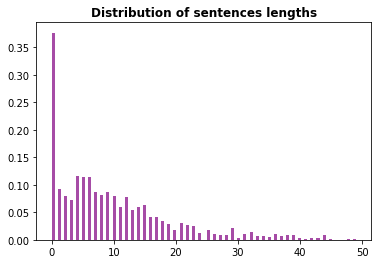

In [112]:
lengths = []
for lst in broken_text: 
  lengths.append(len(lst))
num_bins = 40
n, bins, patches = plt.hist(lengths, 100, color ='purple', density = 1, alpha = .7)
plt.title('Distribution of sentences lengths', fontweight ="bold")
plt.show()